In [1]:
from imports import *
config = load_config("./config.yml")

In [2]:

df = pd.read_csv('./data/data.csv', sep='|', header=None)
# show all columns
pd.set_option('display.max_columns', None)

# load config file containing the column names based on datatype.
config = load_config("./config.yml")


In [3]:
pre = preprocessing(df, config)
df = pre.rename_cols()
df = pre.fillna()
df = pre.remove_outliers()
df = pre.drop_duplicates()
df = pre.convert_dtypes()
df = pre.labelencode()


In [4]:
feat_engg = feat_engg(df, config)
df = feat_engg.split_datetime_col()
df = feat_engg.cal_time_diff() # calculate the time difference between the 
df = feat_engg.categorify_columns()
df = feat_engg.count_encode_columns()

In [5]:
# feature selection
feat_sel = feature_selection(df, config)
cont_feature = feat_sel.cont_feature_oneway_anova()
cat_feature = feat_sel.cat_feature_mutual_info()
final_features = list(cont_feature) + list(cat_feature)

X = df[final_features]
y = df['target']

In [6]:
train = train_model(df, final_features, config)
X_train, X_test, y_train, y_test = train.split_data()
lr = train.base_model()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [7]:
y_pred = lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.695333667837431
Precision:  0.011482939632545932
Recall:  0.603448275862069
F1 Score:  0.022537025112685124
ROC AUC Score:  0.649659940898633


In [ ]:
rf = train.hyperparameter_tuning_randomforest()

Performing Randomized Search CV for Random Forest
Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [9]:
## Split the data into train and test set with ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE technique to handle imbalanced data



In [10]:
# model training

base_model = train.base_model()


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [11]:
# hyperparameter tuning
train.hyperparameter_tuning_randomforest()
# train the model with best parameters
rf_model = train.train_random_forest()

Performing Randomized Search CV for Random Forest
Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [12]:
lr = LogisticRegression(solver='sag', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.9941796287004516
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
ROC AUC Score:  0.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
## Baseline model is logistic regression
X = df[final_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)


# impor classifcation report and roc_auc_score from sklearn.metrics



In [14]:
# undersampling
X = df[final_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.target==0]
fraud = X[X.target==1]
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

In [15]:
downsampled = pd.concat([not_fraud_downsampled, fraud])


In [16]:
y_train = downsampled.target
X_train = downsampled.drop('target', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)
accuracy_score(y_test, undersampled_pred)
print(classification_report(y_test, undersampled_pred))


              precision    recall  f1-score   support

           0       1.00      0.71      0.83      9907
           1       0.01      0.57      0.02        58

    accuracy                           0.70      9965
   macro avg       0.50      0.64      0.42      9965
weighted avg       0.99      0.70      0.82      9965



In [17]:
print(accuracy_score(y_test, undersampled_pred))
print(confusion_matrix(y_test, undersampled_pred))

0.7047666833918715
[[6990 2917]
 [  25   33]]


Precision: 0.011186440677966102
Recall: 0.5689655172413793
AUC: 0.70


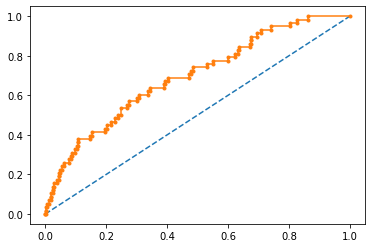

In [18]:
# print precision and recall scores
print("Precision:", precision_score(y_test, undersampled_pred))
print("Recall:",recall_score(y_test, undersampled_pred))
# print()
# plot ROC curve
undersampled_probs = undersampled.predict_proba(X_test)
undersampled_probs = undersampled_probs[:, 1]
auc = roc_auc_score(y_test, undersampled_probs)
print('AUC: %.2f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, undersampled_probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [19]:
downsampled.target.value_counts()

0    190
1    190
Name: target, dtype: int64

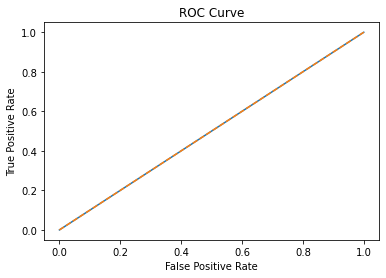

In [20]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [21]:
## Undersample 


In [22]:
from sklearn.model_selection import StratifiedKFold
X = df[final_features]
y = df['target']
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in kfold.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


TRAIN: [    0     1     2 ... 49819 49821 49822] TEST: [    3    11    16 ... 49812 49817 49820]
TRAIN: [    0     1     2 ... 49819 49820 49822] TEST: [    4     6    13 ... 49796 49797 49821]
TRAIN: [    0     3     4 ... 49820 49821 49822] TEST: [    1     2     7 ... 49807 49814 49816]
TRAIN: [    0     1     2 ... 49818 49820 49821] TEST: [    5     9    18 ... 49815 49819 49822]
TRAIN: [    1     2     3 ... 49820 49821 49822] TEST: [    0    14    25 ... 49811 49813 49818]


In [23]:
rt = pd.concat([X_train, y_train], axis=1)

In [24]:
# example of stratified k-fold cross-validation with an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], flip_y=0, random_state=1)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
	# select rows
	train_X, test_X = X[train_ix], X[test_ix]
	train_y, test_y = y[train_ix], y[test_ix]
	# summarize train and test composition
	train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
	test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
	print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=660, 1=6, Test: 0=330, 1=4
>Train: 0=660, 1=7, Test: 0=330, 1=3
>Train: 0=660, 1=7, Test: 0=330, 1=3


In [25]:
y =pd.DataFrame(y, columns=['target'])

In [26]:
y.value_counts()

target
0         990
1          10
dtype: int64

In [27]:
(660/666)*100

99.09909909909909

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = df[config['all_features']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [29]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
print(accuracy_score(y_test, smote_pred))


# f1 score
print(f1_score(y_test, smote_pred))

print(recall_score(y_test, smote_pred))


0.8522829904666333
0.03664921465968587
0.4827586206896552


In [30]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
print(accuracy_score(y_test, smote_pred))


# f1 score
print(f1_score(y_test, smote_pred))

print(recall_score(y_test, smote_pred))


In [ ]:

df[config['cat_cols_for_feature_selection']] = df[config['cat_cols_for_feature_selection']].astype('int64')
fs = SelectKBest(score_func=mutual_info_classif, k=7)
X = df[config['cat_cols_for_feature_selection']]
y = df['target']
x_best = fs.fit_transform(X, y)
print('orinal feature names:', X.columns)
print('selected top 5 features:', X.columns[fs.get_support()])



In [ ]:

fs = SelectKBest(score_func=f_classif, k=7)
X = df[config['cont_cols_for_feature_selection']]
y = df['target']
fs.fit_transform(X, y)
print('orinal feature names:', X.columns)
print('selected top 5 features:', X.columns[fs.get_support()])

In [ ]:
df.columns

In [ ]:
df.columns

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier
esf = ExhaustiveFeatureSelector(RandomForestClassifier(), min_features=4, max_features=5, scoring='roc_auc', print_progress=True, cv=2)
X = df_engg_[config['all_features']]
y = df['target']

In [ ]:
select_features = df_engg_[config['all_features']].columns[list(esf.fit(X, y).best_idx_)]
print(select_features)

In [ ]:
from category_encoders import LeaveOneOutEncoder
loe = LeaveOneOutEncoder()
X = df[config['categorify_cols']]
y = df['target']
X_loe = loe.fit_transform(X, y)
X_loe.head()